<a href="https://colab.research.google.com/github/willystw/fastai-learning/blob/mnist-identification/Number_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization

The application uses fastai & pytorch library

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.4 MB/s 
     |████████████████████████████████| 46 kB 5.3 MB/s 
     |████████████████████████████████| 188 kB 64.9 MB/s 
     |████████████████████████████████| 1.2 MB 50.1 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 51 kB 400 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

### Download Raw Data

Raw data used here is from fastai course, because the data is in image format, and the image size is identical.

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [6]:
(path/'training').ls()

(#10) [Path('training/7'),Path('training/8'),Path('training/5'),Path('training/4'),Path('training/6'),Path('training/3'),Path('training/2'),Path('training/9'),Path('training/1'),Path('training/0')]

In [7]:
(path/'testing').ls()

(#10) [Path('testing/7'),Path('testing/8'),Path('testing/5'),Path('testing/4'),Path('testing/6'),Path('testing/3'),Path('testing/2'),Path('testing/9'),Path('testing/1'),Path('testing/0')]

In [8]:
fours = (path/'training/4').ls().sorted()

In [9]:
len(fours)

5842

In [10]:
Image.open(fours[542])

## Init Variables

Store images data to a variable, then convert it to a tensor array.

In [11]:
zeros = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()

In [12]:
zero_tensor = [tensor(Image.open(o)) for o in zeros]
one_tensor = [tensor(Image.open(o)) for o in ones]
two_tensor = [tensor(Image.open(o)) for o in twos]
three_tensor = [tensor(Image.open(o)) for o in threes]
four_tensor = [tensor(Image.open(o)) for o in fours]
five_tensor = [tensor(Image.open(o)) for o in fives]
six_tensor = [tensor(Image.open(o)) for o in sixes]
seven_tensor = [tensor(Image.open(o)) for o in sevens]
eight_tensor = [tensor(Image.open(o)) for o in eights]
nine_tensor = [tensor(Image.open(o)) for o in nines]

In [13]:
zero_stack = torch.stack(zero_tensor).float()/255.0
one_stack = torch.stack(one_tensor).float()/255.0
two_stack = torch.stack(two_tensor).float()/255.0
three_stack = torch.stack(three_tensor).float()/255.0
four_stack = torch.stack(four_tensor).float()/255.0
five_stack = torch.stack(five_tensor).float()/255.0
six_stack = torch.stack(six_tensor).float()/255.0
seven_stack = torch.stack(seven_tensor).float()/255.0
eight_stack = torch.stack(eight_tensor).float()/255.0
nine_stack = torch.stack(nine_tensor).float()/255.0

In [14]:
zero_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/0').ls().sorted()]).float()/255.0
one_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/1').ls().sorted()]).float()/255.0
two_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/2').ls().sorted()]).float()/255.0
three_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/3').ls().sorted()]).float()/255.0
four_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/4').ls().sorted()]).float()/255.0
five_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/5').ls().sorted()]).float()/255.0
six_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/6').ls().sorted()]).float()/255.0
seven_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/7').ls().sorted()]).float()/255.0
eight_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/8').ls().sorted()]).float()/255.0
nine_t_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'testing/9').ls().sorted()]).float()/255.0

t_tensors = [zero_t_tensor, one_t_tensor, two_t_tensor, three_t_tensor, four_t_tensor, 
            five_t_tensor, six_t_tensor, seven_t_tensor, eight_t_tensor, nine_t_tensor]

## Using Pixel Similarity Method

In this method, get average pixel value of a number. Then, calculate similarity with each number to determine which number is closest to prediction.

In [ ]:
mean0 = zero_stack.mean(0)
mean1 = one_stack.mean(0)
mean2 = two_stack.mean(0)
mean3 = three_stack.mean(0)
mean4 = four_stack.mean(0)
mean5 = five_stack.mean(0)
mean6 = six_stack.mean(0)
mean7 = seven_stack.mean(0)
mean8 = eight_stack.mean(0)
mean9 = nine_stack.mean(0)

means = [zero_stack.mean(0), one_stack.mean(0), two_stack.mean(0), three_stack.mean(0), four_stack.mean(0), 
         five_stack.mean(0), six_stack.mean(0), seven_stack.mean(0), eight_stack.mean(0), nine_stack.mean(0)]


Define distance function

In [ ]:
def distance(a,b) : return (a-b).abs().mean((-1,-2))

Use test data to get the function accuracy

In [ ]:
def get_accuracy(tensor_input, predicted_num):
    #init with true elements
    result = torch.ones(len(tensor_input), dtype=torch.bool)
    #get distance between input and predicted number's mean
    base = distance(tensor_input, means[predicted_num])
    #iterate 9 times to compare distance between input tensor and other available numbers.
    #skip if i is predicted_num
    #use logical and to accummulate the result
    for i in range(0,10):
        if i == predicted_num:
            continue
        d = distance(tensor_input, means[i])
        acc = base < d
        result = torch.logical_and(result, acc)
    return result


def get_accuracy_list(predicted_num):
    """Combine multiple get_accuracy functions into one function.
    Take data from t_tensors and iterate it.
    If the index of iteration is the same as predicted_num, use get_accuracy.
    Otherwise, use 1-get_accuracy to predict the chance of not predicted_num.
    Index 0 of the result is the correctness of test data compared with its predicted_num 
    """
    result = [get_accuracy(t_tensors[predicted_num], predicted_num).float().mean()]
    for i in range(0, 10):
        if i == predicted_num:
            continue
        pred = get_accuracy(t_tensors[i], predicted_num).float().mean()
        result.append((1 - pred))    
    return result

In [ ]:
for i in range(0,10):
    r = get_accuracy_list(i)
    print(f"Accuracy of number {i} is {r} with mean {torch.mean(torch.stack(r))}")


Accuracy of number 0 is [tensor(0.8153), tensor(1.), tensor(0.9835), tensor(0.9990), tensor(1.), tensor(0.9933), tensor(0.9906), tensor(0.9990), tensor(0.9887), tensor(0.9911)] with mean 0.9760535955429077
Accuracy of number 1 is [tensor(0.9982), tensor(0.9449), tensor(0.5678), tensor(0.6832), tensor(0.8320), tensor(0.6357), tensor(0.8455), tensor(0.8064), tensor(0.6191), tensor(0.8840)] with mean 0.781683087348938
Accuracy of number 2 is [tensor(0.4234), tensor(1.), tensor(1.), tensor(0.9950), tensor(1.), tensor(1.), tensor(0.9958), tensor(0.9981), tensor(1.), tensor(0.9990)] with mean 0.941138744354248
Accuracy of number 3 is [tensor(0.6089), tensor(0.9898), tensor(0.9991), tensor(0.9767), tensor(1.), tensor(0.8374), tensor(1.), tensor(1.), tensor(0.9476), tensor(0.9931)] with mean 0.9352714419364929
Accuracy of number 4 is [tensor(0.6680), tensor(0.9969), tensor(1.), tensor(0.9767), tensor(0.9990), tensor(0.9787), tensor(0.9614), tensor(0.9932), tensor(0.9908), tensor(0.9594)] with 

## Conclusion of Using Pixel Similarity Method

Most of the test result performs well, with mean > 0.90, although there are some concerns. Some test data does not perform well if tested with the correct number. For example, test 5 only has 0.2276 in confidence that the number tested is 5. For further improvement, test with other methods (e.g Stochastic Gradient Descent /SGD) to get better accuracy

## Using Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is a method to optimize objective function with suitable smoothness properties iteratively. The difference between SGD and gradient descent is that SGD uses mini-batch instead of processing all inputs at once, which makes SGD faster and cost efficient.


There are seven steps when trying to identify number using SGD:

1. Initialize weight with random value
1. Predict the number
1. Calculate the model loss (how far the prediction from actual result)
1. Calculate gradient, to measure new weight
1. Step(change) all the weight based on calculation
1. Go back to step 2, and repeat
1. Iterate until you decide to stop 

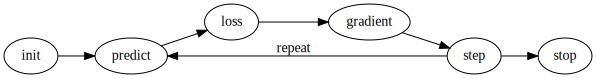

In [ ]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

### Mini-Batch
To split data into several batches, I use `DataLoader` class to load data, randomize the entry, and split the data into several batches.

In [15]:
train_x = torch.cat([zero_stack, one_stack,  two_stack, three_stack, four_stack, five_stack, six_stack, seven_stack, eight_stack, nine_stack]).view(-1, 28*28)
train_y = tensor([0]* len(zeros) + [1]* len(ones) + [2]* len(twos) + [3]* len(threes) + [4]* len(fours) + [5]* len(fives) + 
                 [6]* len(sixes) + [7]* len(sevens) + [8]* len(eights) + [9]* len(nines))
train_dl = DataLoader(list(zip(train_x, train_y)), batch_size=256)

In [16]:
validation_x = torch.cat([zero_t_tensor, one_t_tensor, two_t_tensor, three_t_tensor, four_t_tensor, five_t_tensor, 
                     six_t_tensor, seven_t_tensor, eight_t_tensor, nine_t_tensor]).view(-1, 28*28)
validation_y = tensor([0]* len(zero_t_tensor) + [1]* len(one_t_tensor) + [2]* len(two_t_tensor) + [3]* len(three_t_tensor) + [4]* len(four_t_tensor) + [5]* len(five_t_tensor) + 
                 [6]* len(six_t_tensor) + [7]* len(seven_t_tensor) + [8]* len(eight_t_tensor) + [9]* len(nine_t_tensor))
validation_dl = DataLoader(list(zip(validation_x, validation_y)), batch_size=256)

In the code above, I map the X axis with image tensors, and Y axis with numbering label to create a dataset. I do this process for both training data and validation data.

In [35]:
def train_epoch(model):
  result = []
  for xb, yb in train_dl:
    loss = calculate_gradient(xb, yb, model)
    for p in params:
      p.data -= p.grad * lr
      p.grad.zero_()
    result.append(loss.detach())
  return torch.stack(result).mean()

def calculate_gradient(xb, yb, model, loss_func=F.cross_entropy):
  preds = model(xb)
  loss = loss_func(preds, yb)
  loss.backward()

  return loss

def train_model(model, epochs):
    for i in range(epochs):
        loss = train_epoch(model)
        accuracy = validate_epoch(model)
        print(f"Loss: {loss}")
        print(f"Accuracy: {accuracy}")
        
def linear1(xb):
    return xb@w + b


In [36]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in validation_dl]
  return round(torch.stack(accs).mean().item(), 4)

def batch_accuracy(result, yb):
  scores = result.softmax(1)
  accuracy = num_correct(scores, yb) / float(yb.size(0))
  return accuracy

def num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).float().sum()


I define several functions. `train_model` is the main method that will be used to view function loss and mode accuracy. In every epoch, functions `train_epoch` and `validate_epoch` is called sequentially. In `train_epoch`, the function will calculate gradient by using cross entropy.

In validation process, `batch_accuracy` will caluclate SoftMax distribution. This distribution determines probability of a numeric image detection result from number 0 to 9. In `num_correct`, the function will get which array index has highest probability as a result, and compared with actual result to test the model accuracy.

In [37]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

#Init variables with random values
w = init_params((28*28, 10))
b = init_params(10)

params = w , b
lr = 1.


In [23]:
#Print weight and bias before training
w,b

(tensor([[ 1.9269,  1.4873,  0.9007,  ..., -1.6047, -0.7521,  1.6487],
         [-0.3925, -1.4036, -0.7279,  ..., -0.1596, -0.4974,  0.4396],
         [-0.7581,  1.0783,  0.8008,  ...,  1.3347, -0.2316,  0.0418],
         ...,
         [-0.0560, -0.4547,  1.2942,  ...,  1.1133,  2.1901,  0.3531],
         [ 0.4474,  0.7192, -1.9300,  ..., -0.8714,  0.2235,  0.2528],
         [ 0.2169,  0.4700,  0.3268,  ...,  0.0470,  0.5487, -1.9951]], requires_grad=True),
 tensor([-0.5247,  0.7532,  1.2962, -0.8335,  0.3063,  5.2543,  0.7062,  2.5766, -2.2327,  1.1580], requires_grad=True))

In [34]:
validate_epoch(linear1)

 XB = tensor([[ 22.7683, -18.2905,  -0.1284,  ..., -10.8393,  23.4420, -18.5193],
        [ 26.5479, -13.7560,   9.2821,  ..., -13.1901,  17.2790,   5.7651],
        [ 16.9208, -25.4187,   3.7119,  ...,  -8.4977,   7.1642,  -5.8393],
        ...,
        [  4.4302, -22.0376,  -4.4585,  ...,  -5.4340,  -4.8284,  10.7013],
        [ 18.7224, -20.5547,  -4.1579,  ..., -21.0387,  14.2139,   4.6480],
        [ 19.9833, -20.2256,  -4.6465,  ..., -12.6474,  17.5140,   4.4588]], grad_fn=<AddBackward0>)
 SCORES = tensor([[3.3766e-01, 4.9759e-19, 3.8422e-11,  ..., 8.5682e-16, 6.6234e-01, 3.9584e-19],
        [9.9989e-01, 3.1347e-18, 3.1732e-08,  ..., 5.5204e-18, 9.4303e-05, 9.4207e-10],
        [9.9962e-01, 4.0928e-19, 1.8335e-06,  ..., 9.1356e-12, 5.7889e-05, 1.3040e-10],
        ...,
        [1.8229e-03, 5.8341e-15, 2.5145e-07,  ..., 9.4805e-08, 1.7372e-07, 9.6452e-01],
        [9.8906e-01, 8.6568e-18, 1.1440e-10,  ..., 5.3353e-18, 1.0894e-02, 7.6343e-07],
        [9.2196e-01, 3.1783e-18, 1.85

0.5094

In [20]:
train_model(linear1, 20)

Loss: 1.1368932723999023
Accuracy: 0.2582
Loss: 0.5502617359161377
Accuracy: 0.2812
Loss: 0.39715373516082764
Accuracy: 0.3349
Loss: 0.3519817292690277
Accuracy: 0.3755
Loss: 0.323694109916687
Accuracy: 0.4091
Loss: 0.305554062128067
Accuracy: 0.4286
Loss: 0.29184842109680176
Accuracy: 0.4418
Loss: 0.27974575757980347
Accuracy: 0.4519
Loss: 0.2693098783493042
Accuracy: 0.4601
Loss: 0.2599692642688751
Accuracy: 0.4683
Loss: 0.251607209444046
Accuracy: 0.4736
Loss: 0.24423149228096008
Accuracy: 0.4811
Loss: 0.23770566284656525
Accuracy: 0.4863
Loss: 0.2319006323814392
Accuracy: 0.4907
Loss: 0.22666724026203156
Accuracy: 0.495
Loss: 0.22190704941749573
Accuracy: 0.4981
Loss: 0.2175595909357071
Accuracy: 0.5015
Loss: 0.21358345448970795
Accuracy: 0.504
Loss: 0.20994223654270172
Accuracy: 0.5066
Loss: 0.2065952569246292
Accuracy: 0.5094


In [22]:
# Print weight and bias after training
w, b

(tensor([[ 1.9269,  1.4873,  0.9007,  ..., -1.6047, -0.7521,  1.6487],
         [-0.3925, -1.4036, -0.7279,  ..., -0.1596, -0.4974,  0.4396],
         [-0.7581,  1.0783,  0.8008,  ...,  1.3347, -0.2316,  0.0418],
         ...,
         [-0.0560, -0.4547,  1.2942,  ...,  1.1133,  2.1901,  0.3531],
         [ 0.4474,  0.7192, -1.9300,  ..., -0.8714,  0.2235,  0.2528],
         [ 0.2169,  0.4700,  0.3268,  ...,  0.0470,  0.5487, -1.9951]], requires_grad=True),
 tensor([-0.5247,  0.7532,  1.2962, -0.8335,  0.3063,  5.2543,  0.7062,  2.5766, -2.2327,  1.1580], requires_grad=True))